In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [14]:
start = '2010-01-01'
end = '2022-05-15'

df = yf.download('TSLA',start=start, end=end)
df.head()

/tmp/ipython-input-14-1401808070.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TSLA',start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [15]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [16]:
df = df.drop(['Date'], axis = 1)
df.head()

/tmp/ipython-input-16-3502562368.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
0,1.592667,1.666667,1.169333,1.266667,281494500
1,1.588667,2.028000,1.553333,1.719333,257806500
2,1.464000,1.728000,1.351333,1.666667,123282000
3,1.280000,1.540000,1.247333,1.533333,77097000
4,1.074000,1.333333,1.055333,1.333333,103003500


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   2991 non-null   float64
 1   (High, TSLA)    2991 non-null   float64
 2   (Low, TSLA)     2991 non-null   float64
 3   (Open, TSLA)    2991 non-null   float64
 4   (Volume, TSLA)  2991 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.0 KB


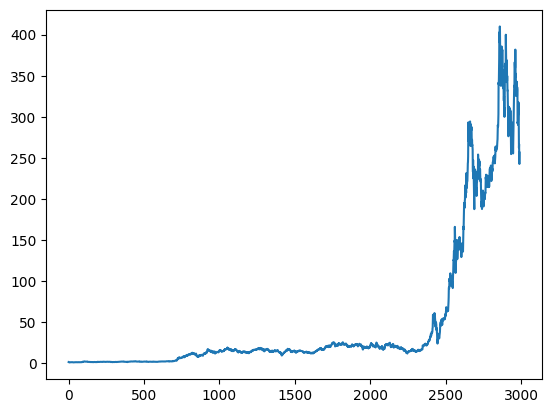

In [18]:
plt.plot(df.Close)

In [19]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TSLA
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2986,317.723499
2987,317.136999
2988,316.493932
2989,315.812032


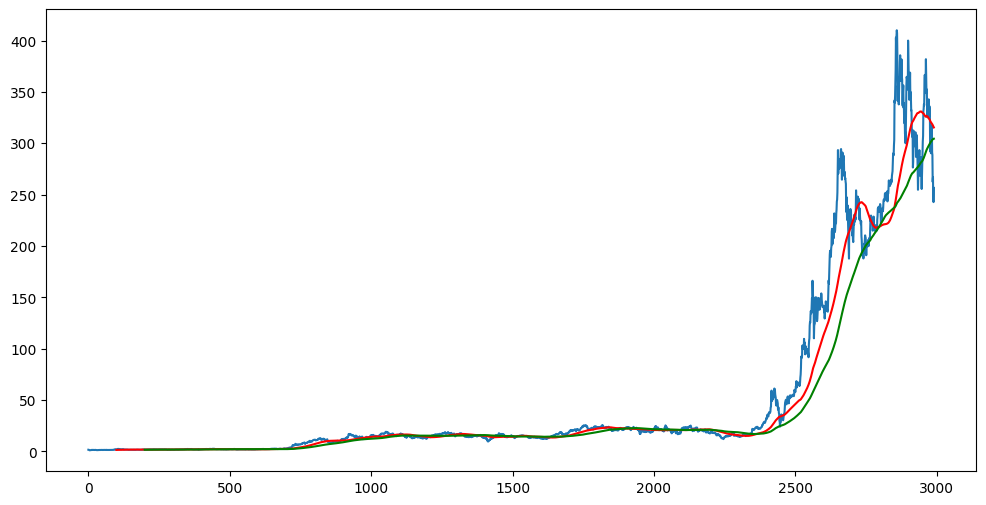

In [20]:
ma200 = df.Close.rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [21]:
data_training = pd.DataFrame(df['Close'][0: int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2093, 1)
(898, 1)


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(2093, 1)

In [23]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
# convert into the numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[[0.02191227],
        [0.02174975],
        [0.01668473],
        ...,
        [0.04062838],
        [0.03756773],
        [0.03708018]],

       [[0.02174975],
        [0.01668473],
        [0.00920911],
        ...,
        [0.03756773],
        [0.03708018],
        [0.03816362]],

       [[0.01668473],
        [0.00920911],
        [0.00083967],
        ...,
        [0.03708018],
        [0.03816362],
        [0.04114302]],

       ...,

       [[0.70977783],
        [0.71248643],
        [0.72578546],
        ...,
        [0.64038455],
        [0.65812568],
        [0.66031957]],

       [[0.71248643],
        [0.72578546],
        [0.74734557],
        ...,
        [0.65812568],
        [0.66031957],
        [0.70636507]],

       [[0.72578546],
        [0.74734557],
        [0.72841276],
        ...,
        [0.66031957],
        [0.70636507],
        [0.69333695]]])

In [24]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences= True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(units=170, activation='relu'))
model.add(Dropout(0.6))

model.add(Dense(units= 1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 120)       │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 120)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 170)            │       197,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 170)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           171 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 376,691 (1.44 MB)

 Trainable params: 376,691 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 322ms/step - loss: 0.0986
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - loss: 0.0121
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 317ms/step - loss: 0.0112
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 322ms/step - loss: 0.0110
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 327ms/step - loss: 0.0101
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 309ms/step - loss: 0.0096
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 322ms/step - loss: 0.0095
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 328ms/step - loss: 0.0084
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 331ms/step - loss: 0.0081
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 332ms/step - loss: 0.0076
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 320ms/step - loss: 0.0085
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 309ms/step - loss: 0.0076
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 309ms/step - loss: 0.0062
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - loss: 0.0064
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 

In [29]:
model.save('model.keras')
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [30]:
final_df.head()

Ticker,TSLA
0,19.448000
1,18.982000
2,19.454666
3,19.782667
4,19.408667


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01888426],
       [0.01771352],
       [0.01890101],
       [0.01972505],
       [0.01878545],
       [0.02353708],
       [0.02296594],
       [0.0232289 ],
       [0.02564742],
       [0.02743452],
       [0.02777117],
       [0.02993847],
       [0.03001384],
       [0.03213423],
       [0.02907255],
       [0.03069216],
       [0.02822842],
       [0.02590368],
       [0.02579984],
       [0.02730555],
       [0.02772428],
       [0.02863374],
       [0.02746467],
       [0.02614486],
       [0.02208999],
       [0.02180525],
       [0.0217617 ],
       [0.02337126],
       [0.02403452],
       [0.02344663],
       [0.02306979],
       [0.02343156],
       [0.02196269],
       [0.02407137],
       [0.02426565],
       [0.02365935],
       [0.02254555],
       [0.02080703],
       [0.01984062],
       [0.02173491],
       [0.02138486],
       [0.01979875],
       [0.01862466],
       [0.01995954],
       [0.02041175],
       [0.02856842],
       [0.02833895],
       [0.027

In [32]:
input_data.shape

(998, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(898, 100, 1)
(898,)


In [35]:
y_predicted = model.predict(x_test)
y_predicted.shape

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step


(898, 1)

In [36]:
y_test

array([0.01357154, 0.01373066, 0.01928958, 0.01834495, 0.02275994,
       0.02544644, 0.02610802, 0.02527895, 0.02652172, 0.02768743,
       0.02804418, 0.02720506, 0.02714812, 0.02833728, 0.02887994,
       0.02873088, 0.02551009, 0.02675787, 0.02764053, 0.02838418,
       0.02936733, 0.02922664, 0.02822507, 0.02666743, 0.02459728,
       0.02797551, 0.02762713, 0.02828871, 0.02716654, 0.02872585,
       0.03006743, 0.03027009, 0.03083285, 0.02998034, 0.0311829 ,
       0.03145256, 0.03142576, 0.03313246, 0.0312767 , 0.02838083,
       0.02647314, 0.02579314, 0.02284703, 0.0235823 , 0.01949895,
       0.02464082, 0.02297264, 0.02594388, 0.02576467, 0.02196604,
       0.02033136, 0.02323392, 0.02612644, 0.02619176, 0.02672437,
       0.02780299, 0.02818654, 0.02603265, 0.02771255, 0.02798388,
       0.02819492, 0.02064959, 0.02009018, 0.01819254, 0.01884909,
       0.0197753 , 0.01966476, 0.01984565, 0.02173993, 0.02144683,
       0.02231609, 0.02242998, 0.02384693, 0.02315521, 0.02152

In [37]:
scaler.scale_

array([0.00251232])

In [38]:
scaler_factor = 1 / 0.00682769
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor
from sklearn.metrics import r2_score
print('R2 Score: {}'.format(r2_score(y_test, y_predicted)))

R2 Score: 0.9516226880061844


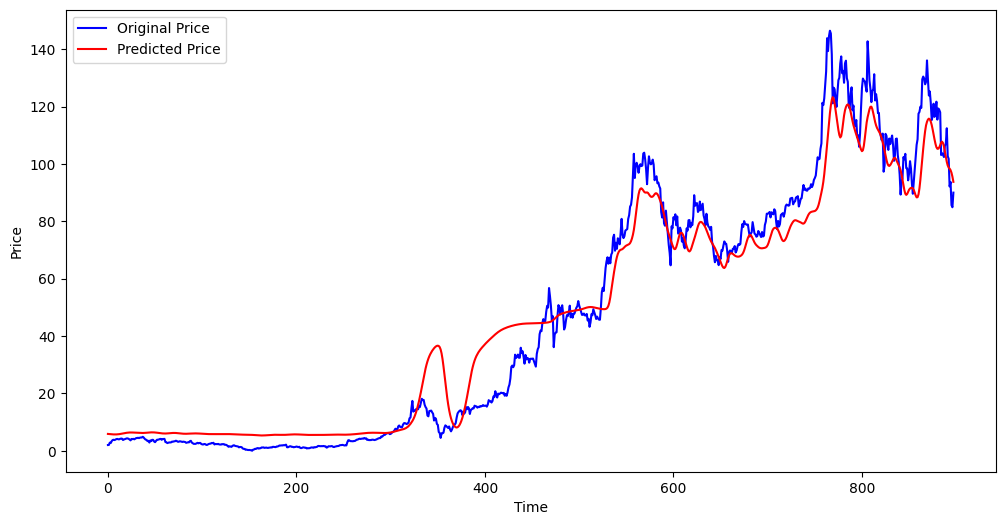

In [39]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()